In [37]:
# Initial imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from pathlib import Path
import seaborn as sns
import pygal  
from matplotlib.dates import MonthLocator, DateFormatter

# Data cleaning  
## In this section, we will need to read the CSV file into DataFrame and perform any necessary data cleaning steps

In [38]:
# Reading data

def dfmake(path):
    """
    Read in a CSV File into a dataframe, and convert date into a datetimeindex
    Args:
        path : The filename and path of the csv file
    Returns:
        The dataframe converted from the CSV file
    """
    path_df=pd.read_csv(path, index_col='Date', infer_datetime_format=True, parse_dates=True)
    return path_df

In [39]:
#import Combined Dataframe
combined_df=dfmake("US&CA Dataset.csv")
combined_df.head()

,Inflation_US,Inflation_CA,Covid_Cases_US,Covid_Cases_CA
Date,,,,
2021-12-01,7.1,1.9,1857993914,70660679
2021-11-01,6.8,1.9,1418982171,52864275
2021-10-01,6.2,2.0,1392031827,52220644
2021-09-01,5.4,2.2,1249406449,47080268
2021-08-01,5.3,2.4,1150163602,45460750


In [40]:
# Count nulls
combined_df.isnull().sum()
combined_df.head()

,Inflation_US,Inflation_CA,Covid_Cases_US,Covid_Cases_CA
Date,,,,
2021-12-01,7.1,1.9,1857993914,70660679
2021-11-01,6.8,1.9,1418982171,52864275
2021-10-01,6.2,2.0,1392031827,52220644
2021-09-01,5.4,2.2,1249406449,47080268
2021-08-01,5.3,2.4,1150163602,45460750


In [41]:
#convert the date index to a date-time column, and then extract to a year/month column
years_months={'Date':combined_df.index}
years_months_df=pd.DataFrame(years_months)
years_months_df['Date'] = pd.to_datetime(years_months_df['Date'])
years_months_df["Month & Year"] = years_months_df['Date'].apply(lambda x: x.strftime('%B-%Y')) 
years_months_df.head()

,Date,Month & Year
0,2021-12-01,December-2021
1,2021-11-01,November-2021
2,2021-10-01,October-2021
3,2021-09-01,September-2021
4,2021-08-01,August-2021


In [42]:
# Check Data Types
combined_df.dtypes

Inflation_US      float64
Inflation_CA      float64
Covid_Cases_US      int64
Covid_Cases_CA      int64
dtype: object

# Conduct Quantitative Analysis


###  Plot data using parallel_categories plot

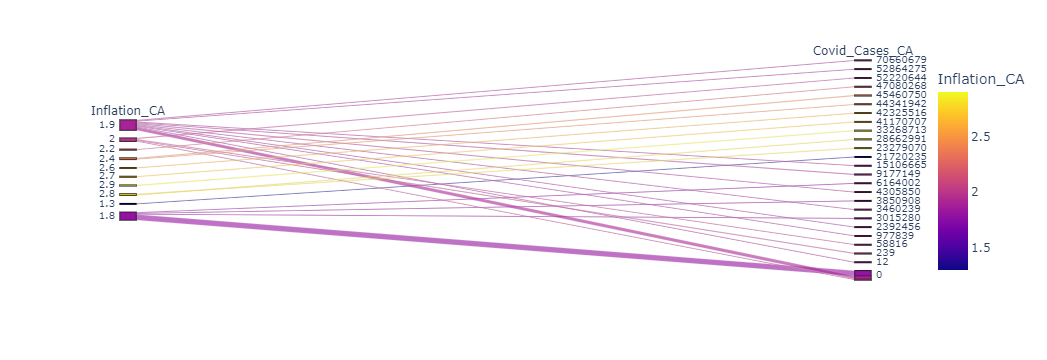

In [43]:
px.parallel_categories(
    combined_df,
    dimensions=["Inflation_CA","Covid_Cases_CA"],
    color="Inflation_CA",
)

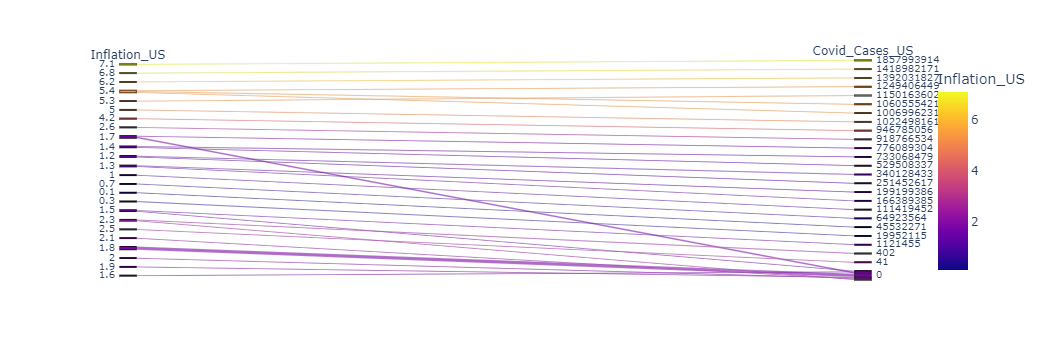

In [44]:
px.parallel_categories(
    combined_df,
    dimensions=["Inflation_US","Covid_Cases_US"],
    color="Inflation_US",
)

# Average covid cases in US and Canada 

In [45]:
# Calculate the average covid cases  for US and Canada 
avg_covid_cases=(combined_df[["Covid_Cases_US","Covid_Cases_CA"]]
         .groupby(combined_df.index).mean())
avg_covid_cases.head()


,Covid_Cases_US,Covid_Cases_CA
Date,,
2019-01-01,0.0,0.0
2019-02-01,0.0,0.0
2019-03-01,0.0,0.0
2019-04-01,0.0,0.0
2019-05-01,0.0,0.0


##  Visualize the data using bar charts and the Pandas plot function. 

In [46]:
def create_line_chart(data, title, xlabel, ylabel, color):
    """
    Create a line chart based in the data argument.
    """
    fig=plt.figure()
    line_plot=data.plot.line(color=color) 
    line_plot.set_xlabel(xlabel)
    line_plot.set_ylabel(ylabel)
    line_plot.set_title(title)
    #plt.show()
    #plt.close(fig)


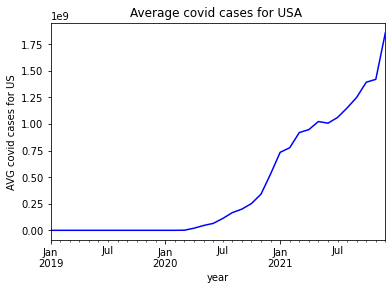

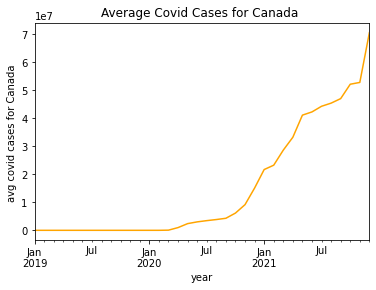

In [47]:
# Line chart for US covid cases 
create_line_chart(avg_covid_cases["Covid_Cases_US"],
                  title="Average covid cases for USA ",
                 ylabel="AVG covid cases for US", xlabel="year",color="blue")
# Line chart for CANADA COVID CASES
create_line_chart(avg_covid_cases["Covid_Cases_CA"],
                  title="Average Covid Cases for Canada ",
                 ylabel="avg covid cases for Canada ", xlabel="year",color="orange")

##  Twin Plot for Inflation & US Cases

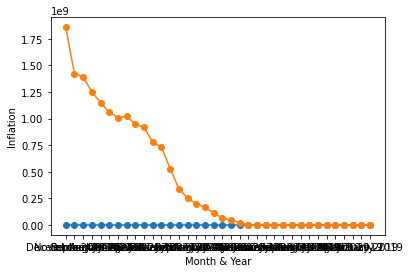

In [48]:
# create figure and axis objects with subplots()
fig,ax=plt.subplots()
ax.plot(years_months_df["Month & Year"], combined_df["Inflation_US"], marker="o")
ax.set_xlabel("Month & Year")
ax.set_ylabel("Inflation")
ax.plot(years_months_df["Month & Year"], combined_df["Covid_Cases_US"], marker="o")
plt.show()

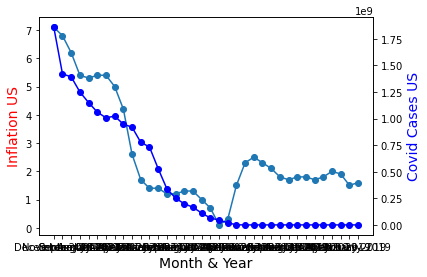

In [49]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(years_months_df["Month & Year"], combined_df["Inflation_US"], marker="o")
# set x-axis label
ax.set_xlabel("Month & Year",fontsize=14)
# set y-axis label
ax.set_ylabel("Inflation US",color="red",fontsize=14)
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(years_months_df["Month & Year"], combined_df["Covid_Cases_US"],color="blue",marker="o")
ax2.set_ylabel("Covid Cases US",color="blue",fontsize=14)
plt.show()
# save the plot as a file
fig.savefig('2_seperate_axes_1_plot_twinx_.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')

# Calculate and plot the correlation

In [50]:
# Calculate the correlation
correlation=combined_df.corr()

# Display de correlation matrix
correlation

,Inflation_US,Inflation_CA,Covid_Cases_US,Covid_Cases_CA
Inflation_US,1.000000,0.431838,0.873074,0.909902
Inflation_CA,0.431838,1.000000,0.486887,0.489899
Covid_Cases_US,0.873074,0.486887,1.000000,0.992986
Covid_Cases_CA,0.909902,0.489899,0.992986,1.000000


## use the heatmap to plot the correlation 

<AxesSubplot:>

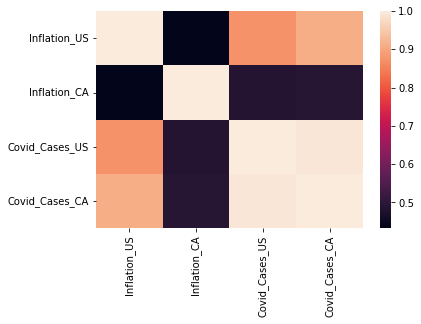

In [51]:
sns.heatmap(correlation) #, vmin=-1, vmax=1)

## Use the parallel coordinate to plot the correlation

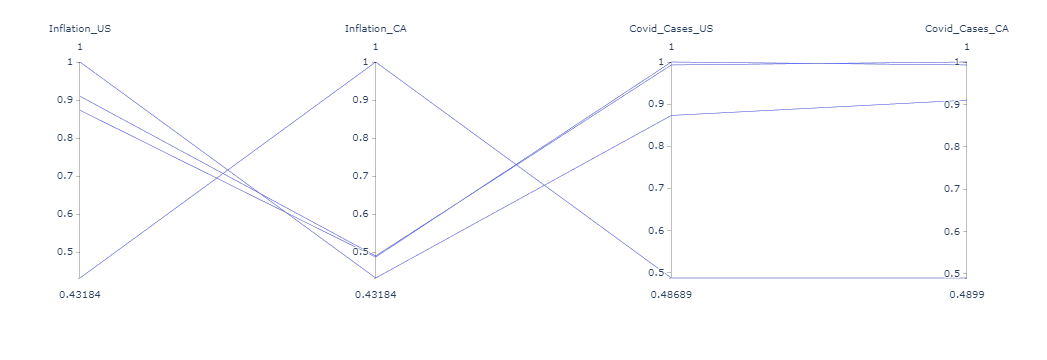

In [52]:
# Plot data using parallel_coordinates plot
px.parallel_coordinates(correlation)

# Rolling Statistics

In [53]:
#Calculate and plot the rolling standard deviation for inflation rate of US  and Canada
inflation_rate=combined_df[["Inflation_US","Inflation_CA"]]
inflation_rate.head()

,Inflation_US,Inflation_CA
Date,,
2021-12-01,7.1,1.9
2021-11-01,6.8,1.9
2021-10-01,6.2,2.0
2021-09-01,5.4,2.2
2021-08-01,5.3,2.4


<AxesSubplot:xlabel='Date'>

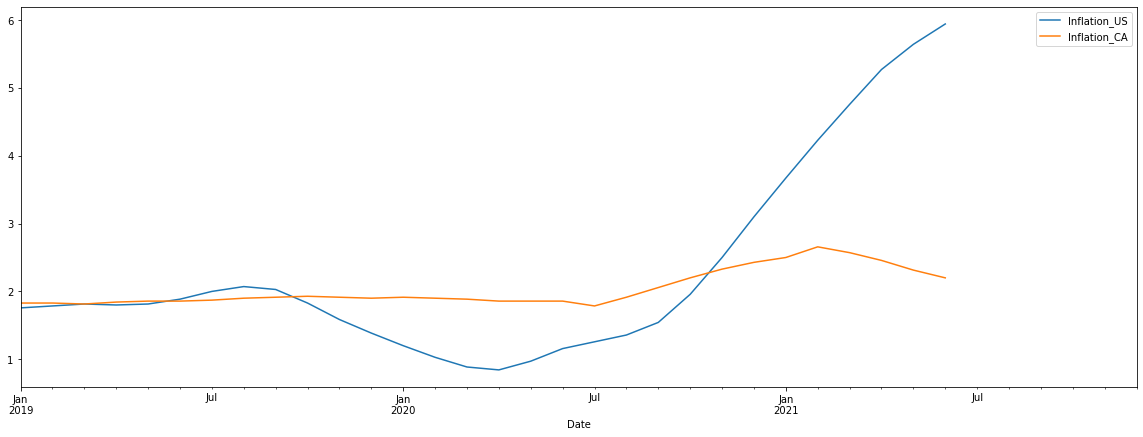

In [54]:
inflation_rate.rolling(window=7).mean().plot(figsize=(20,7))

## Calculate and plot the rolling standard deviation for inflation rate  and covid cases of US   


In [55]:
#Calculate and plot the rolling standard deviation for inflation rate of US  and covid cases us 
inf_cas_us=combined_df[["Inflation_US","Covid_Cases_US"]]
inf_cas_us.head()

,Inflation_US,Covid_Cases_US
Date,,
2021-12-01,7.1,1857993914
2021-11-01,6.8,1418982171
2021-10-01,6.2,1392031827
2021-09-01,5.4,1249406449
2021-08-01,5.3,1150163602


In [56]:
inf_cas_us.to_csv("inflation_rate& covid cases of US.csv")

In [57]:
inf_cas_us.dtypes

Inflation_US      float64
Covid_Cases_US      int64
dtype: object

<AxesSubplot:title={'center':'7 day rolling standard deviation for inflation rate and covid cases of US'}, xlabel='Date'>

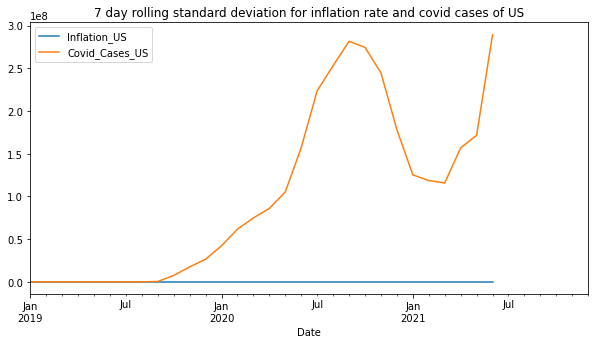

In [58]:
inf_cas_us.rolling(window=7).std().plot(figsize=(10,5), title= "7 day rolling standard deviation for inflation rate and covid cases of US")

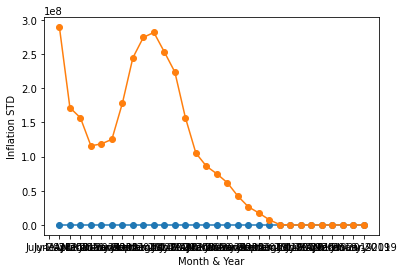

In [59]:
# create figure and axis objects with subplots()
std_plot=inf_cas_us.rolling(window=7).std()

fig_std,ax_std=plt.subplots()
ax_std.plot(years_months_df["Month & Year"], std_plot["Inflation_US"], marker="o")
ax_std.set_xlabel("Month & Year")
ax_std.set_ylabel("Inflation STD")
ax_std.plot(years_months_df["Month & Year"], std_plot["Covid_Cases_US"], marker="o")
plt.show()

## Twin plot for STD (Covid cases & Inflation)

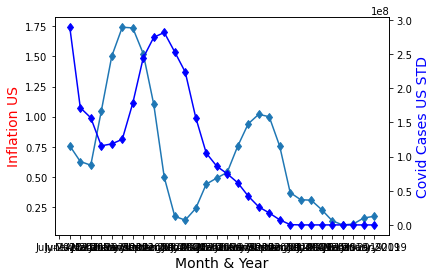

NameError: name 'fig_st' is not defined

In [60]:
# create figure and axis objects with subplots()
fig_std,ax_std = plt.subplots()
# make a plot
ax_std.plot(years_months_df["Month & Year"], std_plot["Inflation_US"], marker="d")
# set x-axis label
ax_std.set_xlabel("Month & Year",fontsize=14)
# set y-axis label
ax_std.set_ylabel("Inflation US",color="red",fontsize=14)
# twin object for two different y-axis on the sample plot
ax2_std=ax_std.twinx()
# make a plot with different y-axis using second axis object
ax2_std.plot(years_months_df["Month & Year"], std_plot["Covid_Cases_US"],color="blue",marker="d")
ax2_std.set_ylabel("Covid Cases US STD",color="blue",fontsize=14)
plt.show()
# save the plot as a file
fig_st.savefig('2_seperate_axes_1_plot_twinx_std.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')

In [ ]:
# Reading and type casting columns in our csv file.
combined_df= pd.read_csv("US&CA Dataset - US&CA Dataset.csv",
                        dtype ={
                            "Date" : str,
                            "Inflation_US" :float,
                            "Covid_Cases_US":int,
                             "Covid_Cases_CA":int,
                              "Inflation_CA": float
                             })

In [ ]:
# importing pygal library
import pygal
# we will append data in list 
#a = []
b = []
c = []
#d = []

# creating object
bar_chart = pygal.Bar()
bar_chart = pygal.HorizontalBar()
# adding range of months from 1 to 12
#bar_chart.x_labels = map(str, range(2019,2020,2021))
for index,row in combined_df.iterrows():
    #a.append(row["Inflation_US"])
    b.append(row["Covid_Cases_US"])
    c.append(row["Covid_Cases_CA"])
    #d.append(row["Inflation_CA"])
   
# adding the     
#bar_chart.add("Inflation_US", a)
bar_chart.add("Covid_Cases_US", b)
bar_chart.add("Covid_Cases_CA",c)
#bar_chart.add("Inflation_CA",d)

# rendering  the file
bar_chart.render_to_file("bar_chart.svg")
